<a href="https://colab.research.google.com/github/cincinnatilibrary/collection-analysis/blob/master/reports/in_transit_too_long_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U python-barcode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 kB 16.5 MB/s eta 0:00:00


'\n/* save these in case we want to use them */\n      .book-media-img {\n        margin-left: 8px;\n        width: 140px;\n        height: 200px;\n        background-image: url("");\n      }\n      .large-print-media-img {\n        margin-left: 8px;\n        width: 140px;\n        height: 200px;\n        background-image: url("");\n      }\n      .music-cd-media-img {\n        margin-left: 8px;\n        width: 140px;\n        height: 200px;\n        background-image: url("");\n      }  \n      .dvd-media-img {\n        margin-left: 8px;\n        width: 140px;\n        height: 200px;\n        background-image: url("");\n        background-repeat: no-repeat;\n        background-size: contain;\n        background-size: cover; \n        background-position: center;\n      }\n'
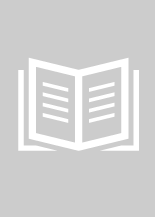
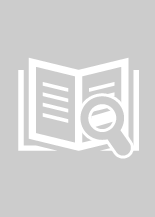
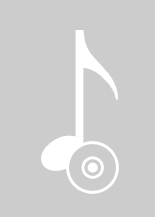
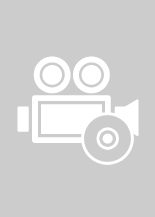

In [ ]:
import base64
import requests
import json
import datetime
from jinja2 import Template
from io import BytesIO, StringIO, TextIOWrapper
from xml.dom.minidom import parseString

from barcode import Code39
from barcode.writer import SVGWriter

# 1 point = 1/72 of an inch
# 1 point = .35mm
options = {
    'module_width': 0.35,
    'module_height': 10.0,
    'text_distance': 3.5
}

# create a new Session
session = requests.Session()

from hashlib import md5

# this is the default value from syndetics, if we don't match an isbn to a jacket
default_bj_hash = md5(
    'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAcFBgYGBQcGBgYICAcJCxIMCwoKCxcQEQ0SGxccHBoXGhkdISokHR8oIBkaJTIlKCwtLzAvHSM0ODQuNyouLy7/2wBDAQgICAsKCxYMDBYuHhoeLi4uLi4uLi4uLi4uLi4uLi4uLi4uLi4uLi4uLi4uLi4uLi4uLi4uLi4uLi4uLi4uLi7/wAARCADIAI8DASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD6QooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACq19fWtjF5t1Msa9s9T9B3rK8Qa/FpimCHEl2R93snuf8K8/u7q4vJmnuZWkkPc/09KlysOx1OoeMXJKWFuFH/PSXk/kKwLnWtUuSfNvpsHsjbR+Qq3pnhy+vQJJB9nhP8Tjk/QV0dr4X0yEDzRJO3+02B+QqNWGhwbyO5y7sx9zmlSWWM5jkdD/ssRXpaaTpiDAsLc/WMH+dJJpGlyDDWEA/3U2/yo5QucLa67q1sRsvZGHpId4/Wuh07xgjEJqFvs/6aRcj8RU934V0+UE27yW7dsHcPyPP61zOp6Ff6eC7p5sI/wCWkfIH1HajVBoek21zBdQia3lWSM/xKamryXT9QutPnE1rKVPdezD0Ir0TQ9at9Vh+X93cKPnjJ/Ueoq1K4WNaiiiqEFFFFABRRRQAVjeJNXXS7TEZBupOIx6f7RrXlkSKN5ZGCogLMT2AryrV76TUb+W6fOGOEX+6vYVMnYaK3725n/ikmkb6lia7Cw0aLSLCXUbtFmuo0Lqh5VD2H196XwjpQihGozr+8cfugf4V9fx/l9a2dbGdHvf+uTfyqEuoXOMGu67csxhlYgfwxxA4/SnfbvEr9DeH6Q//AFqq6Fq0mk3LyrH5qOu1kzjPoc1unxq3bTgPrN/9ahebAy/M8Tv0XUPwRh/Sl8rxQ/bUP++mFaB8aT/w2MY+rk/0ph8ZXna0g/EmjTuBT/s/xO/Vbw/Wb/69XPCbXY1i4t7t5SywsGSRicHcKYfGWodra2/EN/jWdc69dz3sV6I4YriPjdGCN49GyeRRoBueIPDqur3enptccvCOje49/auStbia0uEngcpKhyCK77w3qdxqdvNJcLGGR9o2DHasXxfpIif+0bdcI5xKo7H1/H+f1oa6oDq9F1KLVLJZ0wsg4kT+63+FaFeZeGtSOnakhZsQS/JIO2Ox/D/GvTauLuhMKKKKoAooooA57xpdm30nyVOHuG2/8BHJ/oPxriNItDfajBbc7WbLf7o5NbvjyYtf20GeEi3fiT/9ak8DwBrq5uCPuIFH4n/61ZPWQ+h2aqFUKoAUDAA7VT1gZ0m9/wCuD/yNXaqaqM6Xej/pg/8A6CasR5bRRRWRQUUUUAFFFFAHb+CB/oFwf+mv9BXQ3MEdzbyW8oykilTWB4IH/EtnP/TY/wDoIrpK0WxLPJ7mF7a4lgk+/GxU/hXpfhu7N5o9vIxy6jy2+o4/liuM8YQiLWWcDiVFf+n9K2vAUxMF5ATwrq4H1BH9BSjo7DOuooorQQUUUUAed+NSf7bPtEv9a0/A4H2a7Pfev8qo+OoyuqwydnhH5gn/AOtU/gWUb7yAnkhXH4ZB/mKy+0PodhVbUhnTrsf9MX/9BNWagvxmxuR/0yb+RqxHlNFFFZFBRRRQAUUUUAd34KH/ABKZD6zt/wCgrXRVz/gwY0hveZv5CugrRbEnFeOAPttse/ln+dS+ASftV4O2xf51U8aSh9VSMH/VxAH6kk/4Vo+AYji9mPT5FH6k/wBKS+IfQ7KiiitBBRRRQBy3jq1MljBdKOYX2t9G/wDrgfnXMeG7sWerQuxxG/7tvof/AK+K9JvrZLy0mtZPuyKVz6e9eT3MElrcSW8o2yRsVIrOWjuNHq9Q3YzaTj/pm38qzfDepjULEI7f6RCArg9SOxrWkXfG6f3gRVbiPJKKVgVJB4I4NJWRQUUUUAFFFFAHf+DhjRh7yt/St1mCqWYgKBkk9qxPCAxoqe7t/Oq/i7Uxb232GJv30w+fH8K//XrTZEnI6ncm8v7i57O5I+nb9MV33hC1NtosbMMNMxkP06D9AK4PSbJ9Qv4bVM4Y/MR/Cvc16tGixxrGgAVQAAOwpQXUbHUUUVoIKKKKACuU8Y6ObiP+0bZMyoMSqP4l9fqP5fSuropNXA8jsLyewukuYGwy9QejD0NejaVqdvqcAkhbDj78ZPKn/D3rA8SeG2VnvdOjyp5eFRyPdf8ACuVt557WZZoJGjkXoRWesR7m/r3h+7W8luLOIywyMW2p1UnqMVhtY3qnDWdwD7xn/Cuq03xXGwWPUIyjdPNQZB+o7fhXR215a3S7re4jk9lbJH4UWTA8w+yXX/PtN/3waPsl1/z7Tf8AfBr1ainyhc8p+yXX/PtN/wB8Gj7Jd/8APtN/3wa9Mu9QsrME3FzGhH8Ocn8hzXM6p4rZg0WnRle3muOfwH+NJpILjrDVU0fQIo3Um7YsUiYYI56n2/nXKzzS3U7TSsXlkOSfU0jNLcTEsXllc/Usa7fw14d+ylb2+UGfqkfXZ7n3/lQrsC34W0j+zrUzTri6mHzf7C+n+Nb9FFaJWEFFFFMAooooAKKKKACsPWPDtnqJaVP3Fwf41HDfUVuUUmrgeY6hoGp2RJaAyxj+OL5h/iKyeVPcEV7JVa4sbO55uLWGQ+rICfzqXDsO55al/fIMJeXCj/ZlI/rSSXt5IMSXc7j0aQmvRX8O6K5ybFfwdh/I0qeHtGQ5Fih/3mY/zNLkYXPMlDOwVQWY9AOSa2tO8NaneEM8f2eI/wAUvB/Ada9Ct7S1thi3t4ov9xAKnpqHcLmTpGh2WmANGvmT45lcc/h6VrUUVaVhBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf/9k='.encode('utf-8')
).digest().hex()

# use these images if none are found for these media types
media_formats = {
  'DVD': '<svg height="140px" width="140px" version="1.1" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" viewBox="0 0 15.465 15.465" xml:space="preserve"><g><g><g><path style="fill:#030104;" d="M7.4,8.959c-4.132,0-7.4,0.55-7.4,1.227c0,0.678,3.268,1.227,7.4,1.227s7.543-0.549,7.543-1.227 C14.944,9.508,11.533,8.959,7.4,8.959z M7.263,10.51c-0.957,0-1.733-0.237-1.733-0.53s0.776-0.53,1.733-0.53 s1.732,0.237,1.732,0.53S8.219,10.51,7.263,10.51z M13.319,4.052H9.701L7.769,6.291l-0.92-2.208H1.145L0.933,5.045h2.269 c0,0,1.037-0.136,1.071,0.694c0,1.438-2.376,1.316-2.376,1.316l0.444-1.5H0.869L0.194,7.988h2.668c0,0,2.821-0.25,2.821-2.218 c0,0,0.114-0.574,0.066-0.827L7.124,8.62l3.435-3.565h2.606c0,0,0.798,0.068,0.798,0.685c0,1.438-2.359,1.288-2.359,1.288 l0.365-1.472h-1.287L9.946,7.989h2.453c0,0,3.066-0.19,3.066-2.279C15.465,5.709,15.404,4.052,13.319,4.052z"/></g></g></g></svg>',
  'Vinyl Record': '<svg height="140px" width="140px" version="1.1" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" viewBox="0 0 55.334 55.334" xml:space="preserve"><g><g><circle style="fill:#010002;" cx="27.667" cy="27.667" r="3.618"/><path style="fill:#010002;" d="M27.667,0C12.387,0,0,12.387,0,27.667s12.387,27.667,27.667,27.667s27.667-12.387,27.667-27.667 S42.947,0,27.667,0z M17.118,6.881c3.167-1.61,6.752-2.518,10.549-2.518c0.223,0,0.444,0.003,0.665,0.009 c0.367,0.01,0.619,0.922,0.564,2.025l-0.282,5.677c-0.055,1.103-0.289,1.986-0.523,1.979c-0.141-0.004-0.282-0.006-0.424-0.006 c-1.997,0-3.894,0.43-5.603,1.202c-1.007,0.455-2.212,0.184-2.774-0.767l-2.896-4.897C15.832,8.634,16.133,7.382,17.118,6.881z M15.986,17.295l-4.278-3.742c-0.832-0.727-0.918-1.994-0.119-2.756c0.019-0.018,0.037-0.035,0.057-0.053 c0.802-0.76,2.059-0.605,2.737,0.266l3.494,4.484c0.679,0.871,0.837,1.889,0.391,2.314C17.821,18.235,16.818,18.022,15.986,17.295 z M17.877,27.667c0-5.407,4.383-9.79,9.79-9.79s9.79,4.383,9.79,9.79s-4.383,9.79-9.79,9.79S17.877,33.074,17.877,27.667z M38.17,48.476c-3.156,1.596-6.725,2.495-10.503,2.495c-0.248,0-0.495-0.004-0.741-0.011c-0.409-0.013-0.692-0.929-0.632-2.032 l0.31-5.676c0.061-1.103,0.322-1.981,0.586-1.972c0.158,0.005,0.317,0.008,0.477,0.008c1.834,0,3.582-0.362,5.179-1.018 c1.022-0.42,2.275-0.144,2.877,0.782l3.101,4.77C39.426,46.747,39.156,47.977,38.17,48.476z M43.619,44.656 c-0.766,0.72-2.005,0.551-2.703-0.305l-3.59-4.407c-0.698-0.856-0.876-1.848-0.435-2.255c0.442-0.407,1.443-0.179,2.274,0.549 l4.28,3.744C44.277,42.709,44.386,43.936,43.619,44.656z"/></g></g></svg>',
  'Music on CD': '<svg fill="#000000" version="1.1" id="Capa_1" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" width="140px" height="140px" viewBox="0 0 513.255 513.255" xml:space="preserve"><g><path d="M331.895,421.526V237.344l108.475-17.588c-17.277-91.572-97.64-160.85-194.234-160.85		c-109.201,0-197.721,88.52-197.721,197.721c0,109.202,88.52,197.722,197.721,197.722c10.592,0,20.978-0.857,31.115-2.459 c7.938-13.176,22.177-23.75,40.258-28.271C322.285,422.437,327.108,421.727,331.895,421.526z M282.463,75.043l-21.184,92.811 h-21.185l-15.132-92.811C247.159,63.942,282.463,75.043,282.463,75.043z M246.136,330.033c-40.542,0-73.406-32.864-73.406-73.406 c0-40.542,32.864-73.405,73.406-73.405c40.542,0,73.406,32.864,73.406,73.405C319.542,297.169,286.678,330.033,246.136,330.033z M246.136,200.658c-30.869,0-55.969,25.1-55.969,55.969c0,30.866,25.1,55.97,55.969,55.97c30.867,0,55.969-25.104,55.969-55.97 C302.105,225.758,277.002,200.658,246.136,200.658z  M246.136,296.607c-22.044,0-39.977-17.933-39.977-39.98 c0-22.044,17.939-39.977,39.977-39.977c22.047,0,39.968,17.933,39.968,39.977C286.104,278.675,268.183,296.607,246.136,296.607z M271.458,486.001c0.958,5.308,3.062,10.249,6.1,14.688c-10.296,1.318-20.77,2.075-31.415,2.075 C110.419,502.764,0,392.345,0,256.627C0,120.91,110.419,10.491,246.136,10.491c120.473,0,220.945,87.036,242.01,201.516 l-23.896,3.88C445.057,112.913,354.586,34.702,246.136,34.702c-122.371,0-221.925,99.555-221.925,221.925 c0,122.371,99.555,221.926,221.925,221.926c8.195,0,16.279-0.479,24.246-1.348C270.453,480.125,270.772,483.062,271.458,486.001z M513.255,225.279v213.405c0,17.674-13.175,31.771-33.727,36.96c-22.562,5.592-44.343-3.854-48.67-21.148 c-4.326-17.324,10.45-35.902,33.006-41.547c10.196-2.518,20.227-2.004,28.626,0.952V285.336L377.119,306.42l-0.532,159.944h-0.023 c-0.101,15.15-13.761,30.016-33.408,34.88c-22.283,5.609-45.643-5.001-48.148-20.877c-4.285-17.129,10.32-35.518,32.663-41.115 c10.054-2.5,19.878-1.997,28.135,0.893V250.817L513.255,225.279z"/></g></svg>',
  'Magazine': '<svg fill="#000000" version="1.1" id="Capa_1" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" width="140px" height="140px" viewBox="0 0 513.38 513.38" xml:space="preserve"><g><path d="M462.045,394.095V513.38H51.335V155.524l110.1-0.624l261.71,239.206L462.045,394.095z M164.319,131.598l-44.121,0.248V0 h323.281v370.795l-17.449,0.012L164.319,131.598z M299.983,87.669h110.514V31.614H299.983V87.669z M102.059,0h-29.69v132.118 l29.69-0.163V0z"/></g></svg>'
}

"""
/* save these in case we want to use them */
      .book-media-img {
        margin-left: 8px;
        width: 140px;
        height: 200px;
        background-image: url("data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAJsAAADZCAIAAAC4k9W8AAAAGXRFWHRTb2Z0d2FyZQBBZG9iZSBJbWFnZVJlYWR5ccllPAAABsBJREFUeNrsnV1rajkUQL1TqVg6UBi4UKFQKAh9K/T//wP71IeCr4JCoXDLlBaFwmzMnUzmePyI+do5rvVw8YJFzTon2dnZyfkxmUx60CH+oAkwChgFjAJGAaMYBYwCRgGjgFGMAkYBo4BRwChGAaOAUcAoYBSjgFHAKGAUMIpRwChgFDAKGMUoYBQwChgFjAJGMQoYBYwCRgGjGAWMAkYBo4BRjAJGAaOAUcAoRgGjgFHAKJQzenZ2dn5+TuMWaah+ii96cXExHo9Xq9Xf/yKv8Wct/rnm8vJSGmqxWMznc+1GDXL1/bVGXovRz89PUfvx8SEvTs2iNIUoFH/GYtLP6mf7ScLV1ZW8/v7+Njdut+0ai4acY1C/SLdztcba/fr6Mo5rtyj333A4zG+xsNFWu9fX1/Jfc+PWZdf0pcai/Jzi36evqnVMuzTsSs8stzIWqzS6za5ItfduKbtugKrNYh1GG/eE8PPnz8x2rUX5t5ZRoN+rjYZdG1VFmfKayaLtVGuMzrIafXp6ijsCGbt2yntcQqMx5Y/7k91o4O7uLsNVkvse/Vzz+voaPb5oJDRMI26b8sqb5dNTWywSsZfsdTftmlYOn8m5dm1CQ/pnO+uPO1mUj3BH9yp73fF47HYg8jOm02m43RTZFjehEddiiszXaDQy4b07VFUfGUmf+bbGtTscDlNnREtZPK1Y17WbNITZ8QXqWkGqafYit8ivNantVr0OWN98dNNulFSADYxrX83t9zqBG2QebldDchGj3nYlLN98z2w2k7G5MxZdOl45tm12KHPTTursUQuIUcAoYBQqjnUlFr29vbWZ9KpLA92kx/v7e9wq3JpmL63rJLUUfm5LO4tR5qO/L/NG4adCu6UKceswKtpWq1VruzTsll2A9Fq+lW+7XC5P1Kh4en5+3ruJwA5ROct6vUos9GwDUdHr+i6ZpSvr9bWocIlGXV7Xd8nMtTudTkPu2sfHx0MuPuULbaoz9dGXzI4eGmw3oH+hraa1l+OWzAItVrfQVutqWsOu2REW2PTuLrl6V2YKG5XRUeYngVGr+XNTJRpCYDmjG1tJ52wHi9MyKrHP9Zqe7s1ovhHyYrE4UaPbolb9w5jaTU59tVd9kc1olVpUZNQU4+9uJtdu5umg71Y1DXslyt+jm3MSE7i2pmw2tytFt+tbCawtQtbV67p29ybkNu3O5/MQtTc3N4dbVHtehN75aOu+RHnRuvRh7L69vYUYNR17jRbryzC4drMtT1Z67lJ9OaPWnWux7Hbg9KzyGYbBYHB02zXsBgYmLy8vUSyaa6tUTr98FnA8Hke5M8JbMERno7eIfn5jZb1uYxt2LTHI3niNcfR/qRmd58ppPm1MhdHlcikRrFcBiinnyTmXt0kPr1KVEzUqv382m7mZGtN2O+zaMS9pstcrhauqVEVLr+tbgJIile9lUe3qkNL5qFcBirUbWDnWune4CouVZRi8kr0pPr3I4H0qOaN0h9BtWqz0WO6Kz2HYtBu4N2GxWHTgcHVFuw1DAkX3ELqjCczysNvwN1U/RGTbjh12G/7XQPofIsJuwz3T0AN3G9p94EXGOS+L7DZ83tteRVL5XrG0nh6lO7sNo9g9brehqhMkOrXbMHDJ+uHhodI9o9XMRzft7i6dDcwzbPvz6E+sIMPQtNtjt2H3ckatqXx2G/a6cRprrLAoym7D4nCKXNfAKEYBo4BRwChgFKOAUShB1pzR/f19956BtJfMJ6xkNdpaCF/F8YnKLRYzus1u1c8SNByyb6fjRl0ynGmT1GLO56HWYXSHXW3FnnsPYO+m0R0Vfr7Np6HYM105Z4qqwSRGD6zw8+3iGsWednW6OotJL82EvW66B6xbu3HLAdNtjcrZwWQaR5M+YD2k2DOdxVIhXoHIKOkD1jcP6W19m0Re8h75xG5YVBTrJq3wM1PebUYjBg2qUiV6z+7UfDyx5trPOEYHg8FoNNr7NonUD99Q4HXubp6r7ejaT1s+vvedcgWrMCqhrBm6EgV+pY5iCImiS21KLNDrBj6S0uvc3ROxqGgcDdxGGOXc3cDJorbTAXVFRiEzS69zd2NZVHg64JFGJUbI8OUu14hg326wNaEhgZVJ/R+duLEirUWFh0X8mEwmPegQ1BlhFDAKGAWMAkYxChgFjAJGAaMYBYwCRgGjgFGMAkYBo4BRwChGAaOAUcAoYBSjgFHAKGAUMIpRwChgFDAKGAWMYhQwChgFjAJGMQoYBYwCRgGjGAWMAkYBo4BRjAJGAaOAUcAoRgGjgFHAKGAUo4BRwCjk4h8BBgBW+5e4bBJLsQAAAABJRU5ErkJggg==");
      }
      .large-print-media-img {
        margin-left: 8px;
        width: 140px;
        height: 200px;
        background-image: url("data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAJsAAADZCAIAAAC4k9W8AAAAGXRFWHRTb2Z0d2FyZQBBZG9iZSBJbWFnZVJlYWR5ccllPAAADBdJREFUeNrsnVtPFEsUhYdxVBDOKHIxII54yRhNiA/+/3+ATxpIMHgbYMQLHDiOOoB4VnqfU+l0d/X0par6ttYDGUgzU9Nf1a69d+2qntrc3GxRNVKbt4BEKRKlSJQiUYpESZQiUYpEKRKlSJREKRKlSJQiUYpESZQiUYpEKRKlSJREKRKlSJQiUYpESZQiUYpEKRKlSJREKRKlSJQiUYpEKRIlUYpEKRKlSJQiURKlSJQiUYpEKRIlUYpEKRKlSJQiURKlSJQiUYpEqeKIXrly5dq1a7y5hdyojo2G3rhxo9/vn52d/fO/8Jr8FMW/PM3NzeFGDYfDg4ODshMVofcteMJrEP3x4wfQfv/+HS+aRhG3AgjBTyha/ayOs68E3bp1C69///4tA7fedIWiyOUc1CnE7NzypOj+/PlTGFedIsbfzMyMe4oFE42ku7Kygl9l4FaLrthSoYivU3h7OqW6O3JfAnRhmTGUSbGSRHV0AVWN3aLo+h3UslGsBtHAmICWl5cd01UU8bMqs0CnVTUF6CqvykjIK8GiMqpV9M6cEn358qXZGUjoqpA3W0IjEPKb/cp+b+DRo0cOeonrMfrD0+fPn437F4GEhtxEXciLi/HptikW4rEXaXXDdOUu54/k/HRVQgP2WUX9ZoNFfIR/dq+k1e33+34Dgq+xs7OTn66NbIs/oWGWoo3M1+rqqrj3/qmq8p4RbOY3T366MzMztjOiRVFslq/rp2vVhYlpQLVWkKoUvWCI/O3JNt1KrwNWLx4N0zWSClCOcdVXczutWsjvZCanW4bkIommpgu3PHzNYDDA3Fwbin7VvHJMFx0iNq0lzhZrAUmUIlGKRKkK+7rwRdfX11UmvdKlgf6kx8nJidkq3CpFL5HrJFUp/NSlnUGU8eh/3TxQ+FlCukUV4laDKLCdnZ1F3pcA3WIXIFMt36K14/G4oUTB6dWrVxM3EagpymVZb6oSi/JsAymF1U27ZGavrDctxRIu0ZQur5t2ycxPd2dnJ8+offHiRZLOV/KFtlJn6o0vmWWeGpQZKP9CW5XWXrItmeWkWLmFtqqupgXoyo6wnLfev0uuuiszBRPF7Ij4JKfXKv8uVaJ5lLOc0e9bwTiryaJZROH7rHhqlXgzGiBJxTZaC2MgEzxGM16gwaPR6Pr16wEPeTgcNpSozmstfBqbmppaWFhAe2BC2u2I9QzjBcA1n0eL2owGYbQtLS3dvn2b82jGKRCzV7zX6qdrNRzUsZSgReYCMbbK/EqqK5CLuPDU3DEajknEcY1M2YS3K5miix5z7969QMO+ffume3OZJjFfSp9Dk2CHJeXb6XTwVouLi/v7++4XYcpldf10JybkwnQPDg4yoJ2engaAbrer/gKQqd5KNu0MBgM0ZnV1VbiiXz5+/Bh/zO+E1yQejdyXKG6nji5IpCWKt+33+/CDVJd6//595hEv2Wm0BF1EeiFeoG17e3skqqVrcHkygNPUeAJU2GS1//fOnTt4sb29TaLRity5loGuHydcHjhoBlfB5A3X19dlUoBpefjwYVMyDAjPM9/KAN3ksQ2cl16vZwmnEgw4zDi44vX8/LybLH/xWUAMFCMFKKnuFzxbQLWKU1lgdDW4S9LnmmJ1A9uwHZQowOTKi93d3SQ40TaJqfx2Fc3DfDmxJyHCgR0S89vQedRZAQpClPi3RVfDaIZrExk+ATNcWXHZxPLrBJ/LWZlZwUTH4zFuR6oCFCnnyZ8OxPtIfiDGMsNaTqxNQcvFA0KIohvuaC3m1MhdcnUjCpOF/tvyFaAEjFuYruKRM9kbEyOiMRh8qeykbGsENt2Si2SgHNjesljdtAUoOVP58WYcbCaeBKA+FHPk2tqa9APEoICqs8Aw8g0iGnPHk9NNXjkWY29hQnU4dV1nNBrhv4BW/l233UNiLdtQK5BhSJXsTWjqdeDh7ATueJLJGxe8efMGI1t8H4zUra2tyIthhEg0OEryH0L39etX3fQp2QAZdvv7+xNH/Ozs7E1P/mENrjAYkWYAREHa6mGuFT6HIUw34d4E3QoXRo/ca7wPDPjl5WXkZe12u9vtYjTj59WrVyOvQcCDhhUyTEu02zDPMqf/ELokF+swyAuMzjBOTJNCEW1Wyf0YbxnYIvP++Jp1Jtpy/hARnSFV63Row/HxsfwR5MBPRqQ4PsmFf4kkaju7Wy6r6+AhIjrvRuUFYRU7nQ6mRjQjj/+l88xt762rzG5DtQ885x3RdQ5FDs7O8+fPjXw7jHv3+9RKtNswZpnTQSpfDamJc2RyFfKAgvrsNjRFt+rP8KvVbsPt7e3MVg72XIaprJuSqCO68U95SGLldC6rjQrbxp1Tn5luK8duQ51Rhek20s7z83NJO+isRU2ebWij+4dT+UkWXnQ3VNK22XyZP3/+4N9PTk7Q4e7evStV+bouIsX4JJqUbhL/UxdUwDWT5bnkw/HE0+npqeSY0KvUJovDw0OOUUfCfY8kCgYqtRuj0WgkIMNv0uv1VOfQ5YZsb2prIlFdxhUMAFXq9sKzuNSJAaTOh1pbW1O7S3VHyOn2BJBo3lQObmvkGBoOhxhDyjACHkYbjCpwYrLUvWG73ZatS/LrYDDQDdBUVj2bGnp2Z+RAFPnLdyU2Ragag/PmzZvPnj1TOFWqJHIKd7CPuNNMojC8ut1nUpOtSo3ueIKVhr31j1SM8m63izHn911xmRTC6Qaog7xgQ4m2vF1ju7u7utgXUP3lgMue4sPlmEJA6QExhoFEDUhS/zoGQgj2c2VlJT6JgSvhT+kqFpScnarVXKItr25va2srZglaIl2YX0yW/mrh1v+L85LGSpLZkCrAGj5/tCSSXJ1U2MLAxiORkpf4AvwkgpHf2NiwPZU69XWfPn2KyQm2rvAnm3/69ElFMnCC3LRHLHmtxmhkIXwhxyciIHn37t2DBw8U1Ikj1Yhgom0XYRdmdZ2daaPT0dERfiqoiCkT7jzMKdv71Eoxj9o70yY5VLQBkwKC1IleqxHbq/apGV+KKZ1n5LjYE1Bxi+EfSXkRQsbFxUVwjd8PmlNyUI+Ep/Aq5ubmTK3O2iIaU+GXlq7tYs+WV2KPGAb3d35+Xj4UUQ1+lTnPUk/yJ5B7vR4aUGqiCSv8Uilc7KnOws3f4F+/fr19+xZBJ26uNFX2rkAyC+Abyflx+OiLiwspbVFnyWULbD58+CBuNt4EH2TqICuLVtfeA9YVXbPlgAhSZYk0sC1JzQIxnnOGs1fRS2B75eg62f1vxPY6mketPmA9T7Gnke2LsNKwSRn8KYxLqdw3aHsL8IysPmA9fEhv5GUYc7gmfOxmZpsBqLq8f7zg9yJwEturluQq7OtafVqEhLw6oma/CIZatrlQTqKQfauwvbrqpKpGLy6fFpHT9VO2XY5UkcgnyfFGYUnFGjpfu92enp4uBVH4fkkW/8bjcfJHUqY6d9dNb4t80gQcXYQ9aJvk/bOd6AioYk5mZ2dLQRQOoUxdCS1t2sjS+FEMySkm8bM+fvz45MkTaRvuQ4ZgRkKjloldNwVY3ZyPpEx17q49in7hepX3h62KLPx0puLP7syzjdDIubs5s1GqV11eXspTJ2LOSqk/UYORZapzd01RjLT8UlIUU0IW2bMLJqrsvlXNeQLgtGYwMqEB50VS/5kzwwqkAhB4n06nI3lB+K5SsZ08+FHOY84Vp6nNzc0WZU7379+XRAHMQMJEEsb0xsaGvH79+nXO5wu3ycCsYGwFif+8q3ipp5IcHR3lf1w0iRoW/CM1g8KWToSKC5TJ/fLlS/4GkKh5IXpRO5kWFhb6/X5k2ksOcFX5SPxLldZemqbhcAirK4eYiV8mxb1+V8ifcz48PMxfPUqidrW3twevVc2RMcsGZp/bRKIWBU7Hx8dLS0sYrOFHXmLGxdDE3Hl+fl7bDEP9BFoHnrrdrjqoruUlDk9PT218Iok60qknBx9EX7duIlESpUiUIlGKRCkSJVGKRCkSpUiUIlESpUiUIlGKRCkSJVGKRCkSpUiUIlESpUiUIlGKRCkSJVGKRCkSpUiUIlESpUiUIlGKRCkSpUiURCkSpUiUIlGKREmUIlGKRCkSpUiURCkSpUiUIlGKREmUIlGKRCkSpZLpXwEGAC0gM5UVa2aeAAAAAElFTkSuQmCC");
      }
      .music-cd-media-img {
        margin-left: 8px;
        width: 140px;
        height: 200px;
        background-image: url("data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAJsAAADZCAIAAAC4k9W8AAAAGXRFWHRTb2Z0d2FyZQBBZG9iZSBJbWFnZVJlYWR5ccllPAAADFxJREFUeNrsnWlPIk0bhV0HBQQVUVFBRTHOksz//w9+mEwy6rijKCCK4oKgou95uZ+pEEQolF4ozvlAFNtu6Kvutaq7+zc2NvoogzTAU0CiFIlSJEqRKEWiJEqRKEWiFIlSJEqiFIlSJEqRKEWiJEqRKEWiFIlSJEqiFIlSJEqRKEWiJEqRKEWilOUaMv4bhsPhWCz29v2Tk5Pz83PaqDnyeDz0ukbpy5cvJEqiJEqiJGpfTjg0NDAwQKJGaWRkhERJlERJlERtk8/nI1Gj5PV6SdS0dNc8x9vrnfqxsTESNUoTExMkapT8fj98L4mao/7+/vHxcRI1StPT0yRqlEZHR03Kj0j0/5qZmSFRoxQMBo0xUxL9TwsLC8iSSNQceb3eUChEokYpGo0a0BQk0ZpzMTCwvLzc7b6XROt9LwIqiRql6enpcDhMoqYFVNQzJGqOEEoRUEdHR0nUHA0ODiYSieHhYRI1R8AJqEBLouYIjhdQu2uhNom2kM/ni8fjXVSkkmhrIe9dWloiUaM0OTnZ8LJiEu1ihcPhubk5EjVKkUjE/e0kEm1P0WjU5SvNepfo09PTB/5L2kluvmBmqGeJnp2dXVxceDyekZGRQCCAhFbzXhsoT1dXV7e3t8vlMom6TuWqCoXCyckJiCJMhkKhlmuysUEikQDU5+dnel1X002lUr9//z46Omppf8APS3VhO4lE6/X6+np5efnnz5/j4+PmsRbR1IVrHkj0Xa65XA5cr6+vm2yGvBfZL4l2jSqVyv7+fjKZfHl5adJ5cNUCbhJtLaTEW1tbxWLxvQ3m5+fdU8+QqJZKpRIy22w226RIdclMKom2EVlTVb2X+rokoJJoe4KZnp2dNfwTCtlAIECi3ad0Op3JZBr+KRaLOV6hkuhHdHp6CmOFH37re2dnZ0m0K4WACkt9W9WgknF2BSGJflwIqLlcrg4qvK6zE+Mk+ln3+xYqUiQHb95Lop8taQA1n8/XxlSUpw7erYNEO1On3t7e1r4ZDoedajiQaAdUqVQQU2snahBNnbpinEQ7o/v7+7qASqJdr4uLi2KxqAKq1+t15B4AJNoxwetms9nHx0f1jiOrBkm0k7q5ubm+vkZYlV8dafOSaCeFOArfWyqV5Fefz2d/m5dEO6xyuXx1dSVmCpx+v59Eu748LRQKaimh/Zf+k6glZopiRpJe+9NdErXETEFUalPaqCF6eHiQUGp/y55ErapNpSlo/03wSdQSwUBhpnC8/f39NhcwJGphKEVhCrQ2X0YxxLNvEdHb21uwRK77djkSiXZrDZPL5eBym1xhQa/bfbIZJ4kaKBIlUYpEKRKlSJQiURKlSJQiUYpEKRIlUYpEKRKlSJQiURKlSJQiUYpEKRIlUYpEKRKlSJQiURKlSJQiUYpEKRIlUcosGXLVvtfrHRwc9Hg8pVJJLqtWP5Bod8jv9wcCAbwKy4bbPD099SDXLiM6PDwcDoenpqZ0npIzXBVt1L0sZ2dnwdKFj84mUbLsYaLT09Pz8/NkaQJRmOby8vLY2JjVB/ry5QsyLLkD+cjICF7xzuPjY6VSKZfLeL2/v7+7u6t9nAuJti3kscBp6Y0vUerMzc1NTEw0vKmxHLp2PCFtzufzNzc3AOxmov0bGxtu+0wImbFYzOYbJOoL5nt2dnZ5eUkb1dLMzMzCwoKdR3x+fhbLQ+Uq9SuYwfFKywKvcMgwVuUw8KelpaVIJJJKpa6vr0m0mZAE2faMXXnoA1jWPcROYcZr7Z8CVcFLy22tAXtlZaVYLJ6cnCDK0us6ifMzbhOxIBQKIQDX9i6SyeTFxQVttD522oATiWs6nX77DFh9vb6+Ah5SJEQHfGApqxYXF2G4GCUk+p+8Xi9SIauPAhd6eHjYkSIEAwIjA1Yej8cRZfEOwiq+xd7enuMn0/nKHX4MhYrVmS3O/u7ubmdrSnjvnZ0dBGP5NRgMrq2tkWgffJelj7mBn0TycnR0ZMXdxWGsBwcHp6en8itSYqTBPU0UJYHV4fP4+Pj8/NzSQ2QyGQwa+Rl5k4MP8XaeKPILS3u2yFbsyUIxaLLZrPwcjUZtaF66kahUAtbtH7Um8hfbvg58r6pfbUj03EgUBbt1M9LPz8/IbO38OojTOKK0JpAZTE5O9hxRS11TKpWSk2unkEurqhS+t+fqUeuetlosFj/QEkKa5q9KFi49PDzc3d1hV23tBGEbmRFsFHsLh8O5XK6HiFo3WdZu+IT/n5+f93q9DYvOtlqG8L04OipsKczsJzpgHtFSqaQ/JYLsLBKJJBKJhjj7/s20fP36VXpDOrq6usI4kP+1P+l10kYteqBYPp/Xd/tIStVDX19eXq6rQjiUR3AjFZeZFvBeX19H0alT2uJ7waYxUPDzxMREw7kdM4liIFthppoeEiDhG9UTX9NV1Q4yFD/wtzCy1dVVKZqR7CDb0hkxMFMhGgwGe8jrtpt06KhcLovHaymZMOmrTshsbm4CXkOfAQv79euXalPAA+s8yBlZlXK8Nj8m2Emi+u5RX5ouDpYncREUt7a2AEDeR5aLP01NTY2PjysS2CaZTMo2iLsYCjqHUNPg1qX0rvO6+M6y/qOD+1RsmguZrWr0wKxVxgsTVE0PgMxkMsoV7+3t/fjxA0QxFBAsWha78EDSZEAMtmLsutFGcaY6PkuMRFcnv1UGqjIdpDDIeGt7WJIGq7kUDD6VQmNjHf8vP3g8nl7xupLFIAHpbLbVchtVh8BJiP0h8XmvxQM7UxWIwq/jSNUn6aE4Kjo4OOjgClidzp8qPdVkNQg16TAjptY5AJ3kCAmXis29RRTffGdnp1PLJHVqXFUyqSUNzScMlJGp1Uk6RZf6JDYvPHbF9SQ4U/v7+4eHh2pct2uX6lzrzLYqO1Zgmh9Xba/Y6HxOtXHvPpkdCWGhUJA1ADrZBNJabH9b1bdv32RpC1xcy8VEynkiuZVCE7EcY+K90YCj1OU4OvmXcrYfG6YmEJUvf14V8ASDQQQ84SRPrIetIN3AKwqDukuL8LNsCf/Z8nSrSlE1dLBzlDENkyPpC8rPqFPr9qDjqzU7HmYSrTUjHTuo3V4yUnBt2WQAP4wJDBcMFNQhkh9hGMGqUK7Uhj3YbjKZVDaniOpEfWXQqozpaaLtSjUU35tCqVM6nV5ZWemrdvUwAiRS4k04YRguyhsMEbnIUP0LthTYeF8HkvokVjQ73Z4ZdaT9pEKjzvYwMjnRMFPEYBXz4L0BFXaZzWZrcc7OzqoaJpVK6RxCVbE2XxVjCFGYlOqMa/Zojo+PVeny8+fP99pA2Nv6+npt11CHEApWqYj0Zw7odesF5ykrC/Gq01yE89zd3U0kElJpxONxnH1EU+k2w3bhe7Gr2ukwGG4mk9H5MGqNY2c7Yr1F9PLyUs7j5ORk3Uzne8Lp3tzcXFxclL4gzPG9XiACLVyxZhsE40MtBLT/wuEBk2xU6hmAUTFPp6jd3t4+ODhoUsVifAC8flcLOJXLtf8Sf3NstK96tYIYGYoQANBv1lxVhVxGbmKGYCwVDjww7LitFgEMVF33oemiSfRd5XK5ubk5JK5ITFA7trsOT9pPn/wMsrRTHLUjlwkbdZ8gGKXKYOsuw7ZHMG4cty6XJtFPKZ/PS7NpaGjIhstS6/wtjijNYXhsNVVHop+VMg7ERWUxNmhhYUHNhKuLD0m0M0mvOqFIUsLhsA0HxYHUZaMYUg7ePcXM++2dn5+rxVqxWMzqi47nq1LZmf1XRphPFDo8PFSGgtO9tLRkxaXH2Gc8HlcjplAoOJUQmU8U+vv3r5qsDoVCa2trnc1+kdmur6+rhjC8Au+VYrlwilWZ7/P5vn//HolEPm+s2ANyLuxNLSFLp9M2X4DcEx2GhpI11rIQfnBwECSQK8kFhB9YAYQSZWpqCjupXTwGlnause51on3Vq3QBNRqNiknB9wIwqKBklJVKLdECZCAQGB8fDwaDta6b9wV0WECCqrFuArVSqdzc3Dw8PDw9Pck6JgAGwuF/8nq9wFnnq0ulEqyf9+50WLIMDFkSoqniClc8UZXmTmDucNrucbM9TVR0WRUsDy4UIHUWyPf9a+xhQLS1pI1E7VOxKuSo8Kt+v1/WkaAgQcoDlwvH+/RPMq1m/51XSPSDAjOZHzXj6/CpG6aJREmUIlGKRCkSpUiURCkSpUiUIlGKREmUIlGKRCkSpUiURCkSpUiUIlGKRHtN/xNgAI/bHeqKcvdQAAAAAElFTkSuQmCC");
      }
      .dvd-media-img {
        margin-left: 8px;
        width: 140px;
        height: 200px;
        background-image: url("data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAJsAAADZCAIAAAC4k9W8AAAAGXRFWHRTb2Z0d2FyZQBBZG9iZSBJbWFnZVJlYWR5ccllPAAADjRJREFUeNrsnWtTE08TxSOiAQx3JESDBBAKKC1f+P2/gVZZRRXI/RIgILc/iIYgwec8aelKZXY3k93sZkPOeWEh2ews85vu6ZnpmX325cuXBPWE1MUqIFGKRCkSpUiUIlESpUiUIlGKRCkSJVGKRCkSpUiUIlESpUiUIlGKRCkSJVGKRCkSpUiUIlESpUiUIlGKRCkSJVGKRCkSpUiUIlGKREmUIlGKRCkSpUiURCkSpUiUIlGKREmUIlGKRCkSpUiURCkSpUiUCkndcXugly9fJpPJ/v5+/c3v37/L5fLPnz/DK/T58+d9fX29vb3d3f8qpFQq3d3dSdEk6kdDj0Llul3z36OaVcugODo6ikLRjNyuAdTz83MUCsBtQfRZy9/JhDp98+aNR53WCDh//PhxcnIShCt8QCaTqfYEdQWuR0dH8efaSqIwkWw221C1VnPd3d2F6fhwsLlcDnbp75kLhQK4kqizaU5OTnr4WEu7yefz9saKNjQ7O2vvD9z88Pr6emz719YQHR8fB86m3Mq+fmGXsM6AbUg9BApF0ST6zzpRsx6VhZq6ubmpjn7hmb2Dl7pQYZ2Li4seFyCWri4U4FOpFL7VdlCjjnXFUNzq9LwiNySwbLQGx49g8ehWPUZE8/Pzjh8h0kGQhUIdGwS+ODY2hnJNy8ZvpqamYuh+I7VRVNDS0pJZO6gUhBuIYG06QtSjo+mgQ3W7A6zT8SsIc2xiZo9gCk3BoyU9faKISsx6gePa29tT9wUHi2sw2JcYGL+HGdUMQ1G/prHi0+XlZRMPhkYYqHiHymhq6XQahQI8+KHEUqkkhepwxa3vh5mGOvsRX6IgZLo+1NfKyopg8B7M1NixI1TTYoDn48ePpldYXV2VNoSPwMnRmYtQIsqVJ3SMAHAf3C0+RKOb10UbN3+5tbWllQXf6DE2larXCgU5MyrBTWrgwfJMnPpdtCHw9sApj42GKDdBizEdO27ib0jd3kTh1kx/i25MatY7+nWLk+GrHS/w+K/GX0JCUdXtvPVKx2kjx8b6xImaOCXIFNgNjU0BSWpQZlw9iIKEOeZRt4wIy35siltJSxLnb/51TRnmthNR0y/pgAGRS6PVoV8xK1dCG7dmBAMVCwN4j7GmW6OUvwJPbpppfBxvy4hKnAkb8u7G3PpU+ZYseJlQ5QfErmYz0jYRJBQw55MbbR/tTfR5RebEUJCmrfZXPdFTA9J0ucViUX7vb2pXn9Ycrpit5ykTNduvGlYymQx4Twwca6fBHlet3cr1bU+yMC4t0vyo40YvjkqlUr4rt9rsArawRsuN1ZRCvIi2Xc5H3CwydkR9WJgOfnwHmUEsTJx8fOKg1hA1a1Ax+F6N0i+aMc79/b1buULC7HrtPYq0JLPQ+GSrRGSj5h8slYtK9+d4dfxg2qjavXln6bYdxzwBC+04omYNytgOle62IOrdPuRbjivhapqmjerY12blzpRMaKATdZy76Cyi5pBcZ850ZcNe+XxefjCXyaoLcpwH0HmfRhmgEYghmrP/YacTtwdRWUtJPKZ32ENFzcrd+ivyKMjRu2azWflha2vL3vcCmDQjPLY5L+8jJbHtiTp6V8l+TjSS/VUoFLRmzeUa3KGmch0Xv6pbkg1UPDnwy8+zs7Pm0MWfD2/70YtjmiuoSIiEml1eXvboU2ElAKA92fz8vNmDomZrmoXjrLrmK+Hi1dVVtBK3xoTv7lYkF+BpTa+AB4tV/likWSkwDtNl1SSISNyhIQ8+ReyKT7XWBKc5IqxOh6jpsGFYjuZe3cikUJ2evbm5QYnVT+WW6oCGGKtE+0iJol6WlpYcZ8mrkz885JG37ZHv45jfJOaFxlSXB0ij93XLPYtbin3U+boemQPS10KmExPD9dge412zbmatnlmSxMyPUCicitu0lHQEcZszil0GduJxrQ3OFj+kUild8fCIXOqmWNbNQZFC7yqC78WV3vOLsd0r0ZpdEk3Z9GKPU6EG3/QSc5yJFu5kakr9emRdu7lfFBowg6TR7VOdQlTqF12jv0Q69GEHBwf+hg0o0Udyk4TTYBmr+YR4ERXBTFG/9tlGoAi79DEbXNOY0um044YWN5YoMeA25E4hqlxlRAg51rJsWHOMhINw1UId/T9Awhm4RcIk2gDd6vwjTTMLuwuoiajjnHrioe4YPpMMISIuNFbrJ3EnOlpR4klLV4SePlHHzX5PT+iJt7a24gC1KwIDTXSGYrKfKXSiTZmjoWJElPLtxhs6uCvWsW6Hq2YtttHVuhYQ/fr169Oo+s+fP4cRSNrPZNFG4+5mc7lc8LCDRFsv2eXu+6jCGBF1OzUq5mpi3kKjCwZxJxqrI0aiV6PH0IZLFM1KN96aaotVp7AFL+qWTFP3pMOoidY9ebO3t1dTljtTkqHRNjMMHtap3QPHlK0qmnNGT00kSqJUvMUZhoY1MjLy6tWrrq5aY+jp6clms79+/TKPWCLRWGt6etrx9y9evEin0/JzC/c20euGohauCtNGG9P9/f319TVc68PDw+3tLf6FOYIfhivJZBL/wiH39/fXHeCRaItVKpUuLy/B0jFfUM7bqf5ooKLh4eHojZVE6wgmeHR01GgK/3VFh4eHMnmLLpZEW69yuVwoFE5PT+Fa/d3h79+/Z2dnFxcXiJgmJibM8JhEoxNc6M7Ozp8/f4LfCg0CLQNWPjMzg16WsW4LhNrf2NhoCs5q772+vo7OmEQjFfxkPp/f3d3FD02/OYx1e3sbnSuJRqf9/f2wDyc6Pj7WM9NINFwhpkUgE0FB8kZcEg1XGGwgfomsOPjekLbCkei/KQJEthF32ChRjwIm0Sbr4OAgjMr1FmLpME634njU+d1O9SuuuztVkSSgFItFOXiuoZug2x4fH+/p6SHRZqrR7nNgYODt27eOeX6NThnC96J0t+U5el0/ur29td/G++zZs0wmMzc355G2mcvlFhcX7eeGLi8vm7uY2uk2enFxYXklHOy7d+/0cM+Hhwc5QwXdYVdXFz4dHR2VlRbwXlhYsDw9C2YKm27iNng/RDGWkpPzPAKNdiFq6SHx98I36tJYoaLqeSUMfuBv+/v7379/LzPyk5OTiLZsWgzMtMVEy+Xy00iwLpVKlh5vampKz/tdW1tze00Nhpjfvn2DKY+NjSUqJywXK/K+OS6QZXP2o0FlOcaH5Um/CKNcXV1VQnK+J+ANDQ0pD1yzt7cn16DfRVOwKUKTzYL3qa3sR1u1NViP4rZ8IxQiW53o0bf/IOKFCepSNkAeHx+rK97c3Pzw4QOIoilgnFN3sIthz8jIiAZK/o4t7Fwb1fEfAl2b+FYNVCOd4eFhRLzVmQkSBuu5waCiITQutvH/8kMymUQpemS/j8PWOpGoekgbF6fjEDhGsT8EPm4buWBnuoVS8du8v1GfRHvr3d1d+DAfByS1wOu2fCOwHjpoM/OnQ09drAYhj7wh9KnSPasDsHnZrG7ODL4FqgVE47MR2GZZW/M0NaXBOw1MHYBmJ9lkeuqTwHsz1g3wx1ukcqkdKxjvzc56vbKx2RytFwfPnQidaJw3e9u4OHWeCG51MsEjO/Dq6qrGt9vEX/okwasrdKJxPmvYJo1WR4qDg4PqTt1yharPVpZJhoTTu+MDBmstJprP5wOeQB7BMMZD4CdDCLhoHYfI+4ZqPCRsd29vT21Oidq0aTVo32+7jS4ykkDc8gUe0Qh1LVM5li9vLhQKcqgChpuIY6WnxC/Pzs5guBjewK/WbDLEldI14vc2kPRJgp/23YmRkVa9do11Ow4106WlJe3zEP0CKuzy5OSkGufExIQeN2W5aKHxf/C9p51IFCalr+OuPhDfQ/v7+9r1fvr0yW0aCHdbWFionjW0IYQBq/To9isH8RqPxkFwnnI4Jv61SfaB89zY2Jibm5ORxszMDGofvSmAgQFsF74Xt9LoKVFZczw+PrZ5GD2mEz1x8D+tQ4kiWJN6HBkZqVnpdBOqe2VlBR2wzAvCHN3mAtHRwhVbBvloHzJHn7BerKXXdbZRmQMCGPsjFovF4vfv37e3tz22xKB9ALz9mA041eXCE9BG/QsuUYwsk8kAgP1kzWVFiGVSqRRiVHTGMsKBB4YdNzRFAANFGKXP05S/q3OJnp6eyjIkAhOMZ/DfRq08eFK8pnbCUTdrg0bnzuvCKDWCjXgbts4TodyaWJpEA+ni4kImXbu7u6enp4OvezTkb1GiLBXAYzdxX2mn5+uqcci7GyIrN5vN6kp4czcfdjpR9IVaoQhSXr9+HUGhKEhf94Mm1dwzyriT6f/T7ppV++7dOw0+Q9LbijQ6azQiI1Er7ezsqKGgunO5XBjnmuCeMzMz2mKurq6aGBCRaK3W1tZ0sXp0dHR+fr650S8i24WFBZ0QhlfY3NwMJeaK4RtlWygYqNpQuVw+qcj3eUZqmrhnOp1Wuy8UCmHsHCVRZ+nqqUj27Z6fn/vIAMIQBXdDCF2dPAYPb799ikSbI4xkJicnq7MywRVDRrhlxMZ10QLkwMDA0NDQ4OBgtevGuBNxddin75Koq4AEo8aaBVS44uvr62KxCMZ3d3f39/cADIQvHtXX1wecNYHV7e3t4eFhNClXJFpHiJIymYzlwripUqkEpx2qmyVRP4LlwYUiUrVJkE88TuzBKG1SO0m0lYJfTaVSkkeCAQlCHrhcON4/j5JltehPXiHRJyvOMJAoRaIUiVIkSpEoiVIkSpEoRaIUiZIoRaIUiVIkSpEoiVIkSpEoRaIUiZIoRaIUiVIkSpEoiVIkSpEoRaIUiZIoRaIUiVIkSpEoRaIkSpEoRaIUiVIkSqIUiVIkSpEoRaIkSpEoRaIUiVLe+p8AAwDetF+jVB2t7AAAAABJRU5ErkJggg==");
        background-repeat: no-repeat;
        background-size: contain;
        background-size: cover;
        background-position: center;
      }
"""

In [ ]:
"""
this is the jinja2 template we'll be using
"""
html_template = Template("""\
<!doctype html>
<html lang="en">
  <head>
    <!-- Required meta tags -->
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">

    <!-- Bootstrap CSS -->
    <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@4.0.0/dist/css/bootstrap.min.css" integrity="sha384-Gn5384xqQ1aoWXA+058RXPxPg6fy4IWvTNh0E263XmFcJlSAwiGgFAW/dAiS6JXm" crossorigin="anonymous" />

    <title>{{ report_title }} {{ branch_name }}</title>

    <style>
      .media-image {
        margin-left: 8px;
        width: 140px;
      }
      .item-info {
        vertical-align: top;
      }
      td {
        vertical-align: middle;
        padding-top: 3px;
        padding-bottom: 3px;
        padding-left: 3px;
        padding-right: 3px;
      }
      tr {
        border-bottom: 1px solid black;
      }
    </style>
  </head>
  <body>

    <div class="container-fluid">
        <h2>{{ report_title }} 🚚 {{ branch_name }}</h2>

        <h3>{{ date_today }}</h3>

        <table>

            {% for item in items %}
            <!-- START ITEM -->
            <tr>
                {# in case we want to bring back book jackets #}
                {# note: commented-out template because we no longer use this
                <td>
                    <div>
                        <img class="media-image" alt="book-jacket" src="{{ item[0] }}" />
                        {{ item[0] }}
                    </div>
                </td>
                #}
                <td>
                    <div>
                        <div>
                            {# best_title / best_author #}
                            {{ item[1] }} {% if item[2] != '' %} / {{ item[2] }} {% endif %}
                        </div>
                        <div>
                            {# callnumber vol (item_type) #}
                            {{ item[3] }} {% if item[4] != None %}[ {{ item[4] }} ]{% endif %} ( {{item[5] }} )
                        </div>
                        <div>
                            Sent From: <b>{{ item[6] }}</b>
                        </div>
                        <div>
                            Sent To: <b>{{ item[7] }}</b>
                        </div>
                        {% if item[8] == '1' %}
                        <div>
                            item was <b>for hold</b>
                        </div>
                        {% endif %}
                        <div>
                            in-transit date: <b>{{ item[9] }} ({{ item[10] }} days in transit)</b>
                        </div>
                        {% if report_title != 'OLD In Transit Too Long' %}
                        <div>
                          barcode: {{ item[12] }}
                        </div>
                        {% endif %}
                    </div>
                </td>
                {% if report_title == 'OLD In Transit Too Long' %}
                <td>
                  <div>
                    {# svg #}
                    {{ item[11] }}
                  </div>
                </td>
                {% endif %}

            </tr>
            <!-- END ITEM -->
            {% endfor %}
        </table>
    </div>

    <!-- Optional JavaScript -->
    <!-- jQuery first, then Popper.js, then Bootstrap JS -->
    <script src="https://code.jquery.com/jquery-3.2.1.slim.min.js" integrity="sha384-KJ3o2DKtIkvYIK3UENzmM7KCkRr/rE9/Qpg6aAZGJwFDMVNA/GpGFF93hXpG5KkN" crossorigin="anonymous"></script>
    <script src="https://cdn.jsdelivr.net/npm/popper.js@1.12.9/dist/umd/popper.min.js" integrity="sha384-ApNbgh9B+Y1QKtv3Rn7W3mgPxhU9K/ScQsAP7hUibX39j7fakFPskvXusvfa0b4Q" crossorigin="anonymous"></script>
    <script src="https://cdn.jsdelivr.net/npm/bootstrap@4.0.0/dist/js/bootstrap.min.js" integrity="sha384-JZR6Spejh4U02d8jOt6vLEHfe/JQGiRRSQQxSfFWpi1MquVdAyjUar5+76PVCmYl" crossorigin="anonymous"></script>
  </body>
</html>
""")

In [ ]:
def bc_to_svg_string(barcode):
  """
  function that converts a barcode string into a code39 barcode
  in an svg string
  """
  bc = Code39(
      str(barcode),
      writer=None,
      add_checksum=False
  )

  with BytesIO() as fp:
    bc.write(fp, options=options)
    fp.seek(0)
    return parseString(
          fp.read().decode('UTF-8')
        ).getElementsByTagName('svg')[0].toxml()
# xmlStr = xmlDocument.toprettyxml(indent='\t', newl='\n', encoding='UTF-8')

def bc_to_svg_file(input_bc):
  """
  function that converts a barcode string into a code39 barcode
  to a file
  https://python-barcode.readthedocs.io/en/stable/supported-formats.html#barcode.codex.Code39
  """

  bc = Code39(
    str(input_bc).upper(),
    add_checksum=False,
    writer=SVGWriter()
  )

  with open(f"{bc.get_fullcode()}.svg", "wb") as f:
    bc.write(f, options=options)

  return bc.get_fullcode()


def make_isbn_img_uri(isbn, physical_format=None):
  # By default it returns a blank image if the cover cannot be found.
  # If you append ?default=false to the end of the URL, then it returns a 404 instead.

  # openlibrary
  # r = session.get(f'https://covers.openlibrary.org/b/isbn/{isbn}-M.jpg?default=false')

  # syndetics
  # sc.gif = small cover
  # mc.gif = medium cover
  # lc.gif = large cover
  r = session.get(f"https://secure.syndetics.com/index.aspx?isbn={isbn}/mc.gif/&client=513-369-3121&type=unbound")

  # print(r.url)

  if r.status_code == 200:
    uri = (
      "data:" +
      r.headers['Content-Type'] + ";" +
      "base64," + base64.b64encode(r.content).decode('utf-8')
    )

    # if the book jacket returned is their default image, instead send the
    # img for our physical format
    if md5(uri.encode('utf-8')).digest().hex() == default_bj_hash:
      # print(physical_format)
      if physical_format in media_formats.keys():
        return media_formats[physical_format]

    return f'<img class="media-image" alt="book-jacket" src="{uri}" />'
  else:
    return None


def yield_rows(r):
  """
  generate rows to feed to the Jinja2 template from the returned Request object (r)
  """
  for i, row in enumerate(r.json()['rows']):
    yield [
        # 0
        # turning this off for now until we want to include images
        # make_isbn_img_uri(
        #     row[
        #         r.json()['columns'].index("isbn")
        #     ],
        #     row[
        #         r.json()['columns'].index("physical_format_name")
        #     ]
        # ),
        0,
        # 1
        row[
          r.json()['columns'].index("best_title")
        ],
        # 2
        row[
          r.json()['columns'].index("best_author")
        ],
        # 3
        row[
          r.json()['columns'].index("item_call_number")
        ],
        # 4
        row[
          r.json()['columns'].index("vol")
        ],
        # 5
        row[
          r.json()['columns'].index("itype_name")
        ],
        # 6
        row[
          r.json()['columns'].index("from_branch")
        ],
        # 7
        row[
          r.json()['columns'].index("to_branch")
        ],
        # 8
        row[
          r.json()['columns'].index("is_for_hold")
        ],
        # 9
        row[
          r.json()['columns'].index("in_transit_date")
        ],
        # 10
        row[
          r.json()['columns'].index("in_transit_days")
        ],
        # 11
        bc_to_svg_string(
            row[
                r.json()['columns'].index("barcode")
            ]
        ),
        # 12
        row[
          r.json()['columns'].index("barcode")
        ]
    ]

In [ ]:
sql = """\
with transit_locations as (
  select
    json_array(from_field_branch, to_branch_name) as to_from
  from
    in_transit_data
)
select
  distinct value as branch_name
from
  transit_locations,
  json_each(transit_locations.to_from)
where
  value is not null
  and value not in (
    'Cincinnati Masonic Library',
    'Harriet Beecher Stowe House',
    'Madeira Historical Society',
    'Sorter--xdcsort1',
    'Taft Museum of Art Library',
    'Virtual Library',
    'W.H. Taft National Historical Site',
    'W.H. Taft National Historic Site'
  )
order by
  value
"""

try:
  r = session.get(
      'https://collection-analysis.cincy.pl/current_collection.json',
      params={
          'sql':sql
      }
  )

  branches = [row[0] for row in r.json()['rows']]

except Exception as e:
  print(e)


sql = """\
with item_data as (
  select
    item_record_num,
    json_array(from_field_branch, to_branch_name) as relevant_branch
  from
    in_transit_data
  where
    in_transit_data.too_long_date is not null
)
select
  in_transit_data.from_field_branch as from_branch,
  in_transit_data.to_branch_name as to_branch,
  in_transit_data.itype_name,
  itype_property.physical_format_name,
  in_transit_data.item_call_number,
  in_transit_data.barcode,
  in_transit_data.best_title,
  in_transit_data.best_author,
  in_transit_data.publish_year,
  in_transit_data.is_for_hold,
  in_transit_data.too_long_date,
  date(in_transit_data.in_transit_timestamp) as in_transit_date,
  in_transit_data.in_transit_days,
  item.item_record_num,
  item.bib_record_num,
  item.volume_record_statement as vol,
  (
    select
      value
    from
      json_each(bib.isbn_values)
    order by
      length(value) DESC
    limit
      1
  ) as isbn
from
  item_data
  join in_transit_data on (
    in_transit_data.item_record_num = item_data.item_record_num
  )
  join item on item.item_record_num = substr(
    item_data.item_record_num,
    2,
    length(item_data.item_record_num) - 2
  )
  join bib on bib.bib_record_num = item.bib_record_num
  join itype_property on itype_property.itype_name = in_transit_data.itype_name
where
  :branch_name in (
    select
      value
    from
      json_each([item_data].[relevant_branch])
  )
  and cast(
    (julianday('now') - julianday(too_long_date)) as integer
  ) {} -- fill in the range here. e.g. 'between 0 and 48'
order by
  itype_property.physical_format_name,
  in_transit_data.itype_name,
  item_call_number,
  vol,
  in_transit_data.best_author,
  in_transit_data.best_title,
  in_transit_days DESC
"""


# delete output folder first
import os
os.system("rm -rf ./too_long_in_transit")
os.system("mkdir -p ./too_long_in_transit/output")

links = {}

# loop through the branches, creating html output for each
# NEW In Transit Too Long
for branch_name in branches:
  r = session.get(
    'https://collection-analysis.cincy.pl/current_collection.json',
    params={
        'sql':sql.format('between 0 and 48'),
        'branch_name': branch_name
    }
  )

  html_template.stream(
      items=yield_rows(r),
      branch_name=branch_name,
      report_title='NEW In Transit Too Long',
      date_today=datetime.date.today().strftime('%A %B %d, %Y'),
  ).dump(f'./too_long_in_transit/output/{branch_name}_new_in_transit_too_long.html')

  links[branch_name] = {}
  links[branch_name]['new_in_transit_too_long'] = f'./output/{branch_name}_new_in_transit_too_long.html'

# loop through the branches, creating html output for each
# OLD In Transit Too Long
for branch_name in branches:
  r = session.get(
    'https://collection-analysis.cincy.pl/current_collection.json',
    params={
        'sql':sql.format('>= 49'),
        'branch_name': branch_name
    }
  )

  html_template.stream(
      items=yield_rows(r),
      branch_name=branch_name,
      report_title='OLD In Transit Too Long',
      date_today=datetime.date.today().strftime('%A %B %d, %Y'),
  ).dump(f'./too_long_in_transit/output/{branch_name}_old_in_transit_too_long.html')

  links[branch_name]['old_in_transit_too_long'] = f'./output/{branch_name}_old_in_transit_too_long.html'


In [ ]:
index_html = Template("""\
<!doctype html>
<html lang="en">
  <head>
    <!-- Required meta tags -->
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">

    <!-- Bootstrap CSS -->
    <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@4.0.0/dist/css/bootstrap.min.css" integrity="sha384-Gn5384xqQ1aoWXA+058RXPxPg6fy4IWvTNh0E263XmFcJlSAwiGgFAW/dAiS6JXm" crossorigin="anonymous" />

    <title>CHPL In Transit Too Long Reports</title>

    <style>
      .media-image {
        margin-left: 8px;
        width: 140px;
      }
      .item-info {
        vertical-align: top;
      }
      td {
        vertical-align: middle;
        padding-top: 3px;
        padding-bottom: 3px;
        padding-left: 3px;
        padding-right: 3px;
      }
      /*tr {
        border-bottom: 1px solid black;
      }*/
    </style>
  </head>
  <body>

    <div class="container-fluid">
        <h2>In Transit Too Long Reports</h2>

        <h3>{{ date_today }}</h3>

        <p>
          The items in the <b>NEW LONG IN TRANSIT REPORT</b> will have a LONG IN TRANSIT status (g) -- meaning they have been in transit for at least 3 weeks.
        </p>
        <p>
          The items in the <b>OLD LONG IN TRANSIT REPORT</b> have been LONG IN TRANSIT for more than a month. Since items go LONG IN TRANSIT after 3 weeks, these have been in transit for at least 7 weeks. These items appeared on previous "NEW" LONG IN TRANSIT lists.
        </p>

        <p>
          Please look for these items on your shelves (public areas, stacks, and hold).
        </p>
        <p>
          <b>If the item is found</b>, please check in the item (check-in no
          patron), which will either:
          <ol>
            <li>put the item IN TRANSIT again to the correct agency</li>
            <li>receive it so it now says it is on the shelf at your own agency</li>
            <li>receive it for an available hold to be picked up at your agency</li>
          </ol>
        </p>

        <p>
          The items will all appear on 2 different agency's
          lists - the sending agency and the receiving agency.
        </p>

        <p>
          ILS staff will mark WITHDRAWN any items still LONG INTRANSIT after one year, as well as clear old messages.
        </p>

        <table>

            {% for item in items %}
            <!-- START ITEM -->
            <tr>
                <td>
                    <div>
                      <b>{{ item[0] }}</b>
                      <div>
                        <a href="{{ item[1] }}">[ NEW In Transit Too Long]</a> | <a href="{{ item[2] }}">[ OLD In Transit Too Long ]</a>
                      </div>
                    </div>
                </td>

            </tr>
            <!-- END ITEM -->
            {% endfor %}
        </table>
    </div>

    <!-- Optional JavaScript -->
    <!-- jQuery first, then Popper.js, then Bootstrap JS -->
    <script src="https://code.jquery.com/jquery-3.2.1.slim.min.js" integrity="sha384-KJ3o2DKtIkvYIK3UENzmM7KCkRr/rE9/Qpg6aAZGJwFDMVNA/GpGFF93hXpG5KkN" crossorigin="anonymous"></script>
    <script src="https://cdn.jsdelivr.net/npm/popper.js@1.12.9/dist/umd/popper.min.js" integrity="sha384-ApNbgh9B+Y1QKtv3Rn7W3mgPxhU9K/ScQsAP7hUibX39j7fakFPskvXusvfa0b4Q" crossorigin="anonymous"></script>
    <script src="https://cdn.jsdelivr.net/npm/bootstrap@4.0.0/dist/js/bootstrap.min.js" integrity="sha384-JZR6Spejh4U02d8jOt6vLEHfe/JQGiRRSQQxSfFWpi1MquVdAyjUar5+76PVCmYl" crossorigin="anonymous"></script>
  </body>
</html>
""")

items = [
    (branch, links[branch]['new_in_transit_too_long'], links[branch]['old_in_transit_too_long'])
    for branch
    in links
]

with open("./too_long_in_transit/index.html", "w") as fh:
    fh.write(index_html.render(items=items, date_today=datetime.date.today().strftime('%A %B %d, %Y')))

In [ ]:
!tar -cvvf - ./too_long_in_transit | gzip -9 > too_long_in_transit.tar.gzip

drwxr-xr-x root/root         0 2023-07-18 13:14 ./too_long_in_transit/
drwxr-xr-x root/root         0 2023-07-18 13:14 ./too_long_in_transit/output/
-rw-r--r-- root/root     14558 2023-07-18 13:13 ./too_long_in_transit/output/Oakley_new_in_transit_too_long.html
-rw-r--r-- root/root   1642080 2023-07-18 13:14 ./too_long_in_transit/output/Hyde Park_old_in_transit_too_long.html
-rw-r--r-- root/root      3033 2023-07-18 13:13 ./too_long_in_transit/output/Pleasant Ridge_new_in_transit_too_long.html
-rw-r--r-- root/root    295097 2023-07-18 13:13 ./too_long_in_transit/output/Avondale_old_in_transit_too_long.html
-rw-r--r-- root/root     23056 2023-07-18 13:13 ./too_long_in_transit/output/Wyoming_new_in_transit_too_long.html
-rw-r--r-- root/root    300749 2023-07-18 13:13 ./too_long_in_transit/output/Outreach Services_new_in_transit_too_long.html
-rw-r--r-- root/root    480511 2023-07-18 13:14 ./too_long_in_transit/output/Madeira_old_in_transit_too_long.html
-rw-r--r-- root/root     88263 202